In [2]:
# n_estimators 越大越好 随机森林中树的数量,训练效果与难度做平衡  0-200

In [5]:
import matplotlib as plt #画图环境
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_wine

In [6]:
wine = load_wine()
wine

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [7]:
wine.data.shape

(178, 13)

In [8]:
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [9]:
#实例化
# 训练集带入实例化后的模型进行训练,fit
# 使用其它接口将测试集导入我们训练好的模型,去获取我们所希望获取的结果(score,Ytest)

In [10]:
from sklearn.model_selection import train_test_split

Xtrain,Xtest,Ytrain,Ytest = train_test_split(wine.data,wine.target,test_size=0.3)

In [11]:
clf = DecisionTreeClassifier(random_state = 0)
rfc = RandomForestClassifier(random_state = 0)

clf = clf.fit(Xtrain,Ytrain)
rfc = rfc.fit(Xtrain,Ytrain)

score_clf = clf.score(Xtest,Ytest)
score_rfc = rfc.score(Xtest,Ytest)

print('Single Tree  :{}'.format(score_clf))
print('Random Forest:{}'.format(score_rfc))

Single Tree  :0.9259259259259259
Random Forest:0.9629629629629629


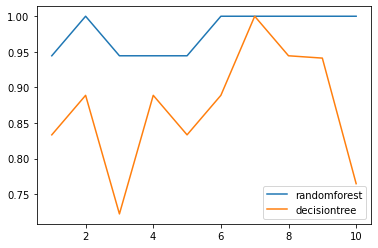

In [12]:
#交叉验证 对不同测试集模型的准确性 cross_val_score

from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

rfc = RandomForestClassifier(n_estimators=30)
rfc_s = cross_val_score(rfc,wine.data,wine.target,cv = 10)

clf = DecisionTreeClassifier()
clf_s = cross_val_score(clf,wine.data,wine.target,cv = 10)

plt.plot(range(1,11),rfc_s,label = 'randomforest')
plt.plot(range(1,11),clf_s,label = 'decisiontree')
plt.legend()
plt.show()

0.9888888888888889 17


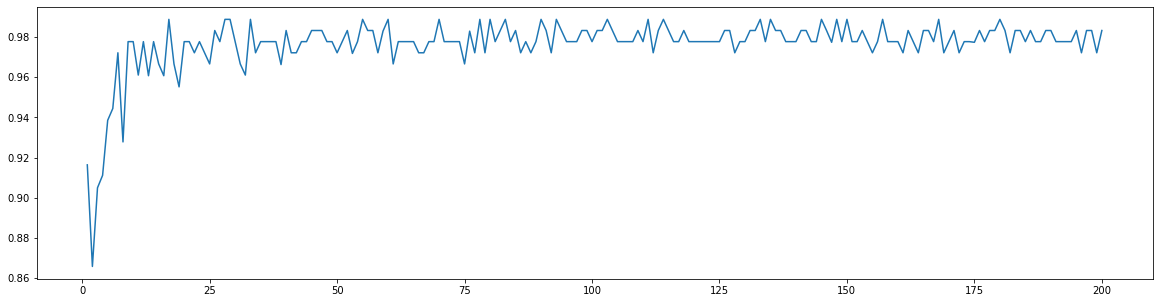

In [13]:
# n_estimators的学习曲线
superpa = []
for i in  range(200):
    rfc = RandomForestClassifier(n_estimators=i+1,n_jobs=-1)
    rfc_s = cross_val_score(rfc,wine.data,wine.target,cv=10).mean()
    superpa.append(rfc_s)
print(max(superpa),superpa.index(max(superpa))+1)
plt.figure(figsize=[20,5])
plt.plot(range(1,201),superpa)
plt.show()

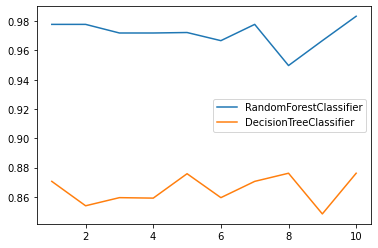

In [14]:
#10次10折交叉验证
rfc_l = []
clf_l = []
for i in range(10):
    rfc = RandomForestClassifier(n_estimators=25)
    rfc_s = cross_val_score(rfc,wine.data,wine.target,cv=10).mean()

    rfc_l.append(rfc_s)

    clf = DecisionTreeClassifier()
    clf_s = cross_val_score(clf,wine.data,wine.target,cv=10).mean()

    clf_l.append(clf_s)

plt.plot(range(1,11),rfc_l,label = 'RandomForestClassifier')
plt.plot(range(1,11),clf_l,label = 'DecisionTreeClassifier')
plt.legend()
plt.show()

In [15]:
import numpy as np
from scipy.special import comb

np.array([comb(25,i)*(0.2**i)*((1-0.2)**(25-i)) for i in range(13,26)]).sum()

0.00036904803455582827

In [16]:
#查看森林中生成树的状况
rfc = RandomForestClassifier(n_estimators=25,random_state=20) #random_state固定的森林
rfc = rfc.fit(Xtrain,Ytrain)

In [17]:
rfc.estimators_

[DecisionTreeClassifier(max_features='auto', random_state=378518883),
 DecisionTreeClassifier(max_features='auto', random_state=1663920602),
 DecisionTreeClassifier(max_features='auto', random_state=1708167439),
 DecisionTreeClassifier(max_features='auto', random_state=1951685855),
 DecisionTreeClassifier(max_features='auto', random_state=1681611676),
 DecisionTreeClassifier(max_features='auto', random_state=1942519002),
 DecisionTreeClassifier(max_features='auto', random_state=1356511625),
 DecisionTreeClassifier(max_features='auto', random_state=521790868),
 DecisionTreeClassifier(max_features='auto', random_state=154144587),
 DecisionTreeClassifier(max_features='auto', random_state=602822422),
 DecisionTreeClassifier(max_features='auto', random_state=823592519),
 DecisionTreeClassifier(max_features='auto', random_state=1934675106),
 DecisionTreeClassifier(max_features='auto', random_state=1626422240),
 DecisionTreeClassifier(max_features='auto', random_state=742452342),
 DecisionTre

In [18]:
for i in range(len(rfc.estimators_)):
    print(rfc.estimators_[i].random_state)

378518883
1663920602
1708167439
1951685855
1681611676
1942519002
1356511625
521790868
154144587
602822422
823592519
1934675106
1626422240
742452342
79503912
176838101
678396378
1467049754
832580347
1359590355
1169590032
1213377277
938905318
1010465510
1215491262
